 <img src='logo_ia_school.png'>

### EXAMEN Analyse de donnée avec Python : OPEN FOOD FACT 
https://fr.openfoodfacts.org/

In [ ]:
### Présenté par:
| Prénoms       |     Nom         |   
| ------------- |: -------------: |
| Amadou lamarana      | DIALLO               |


<img src='image.png'>

### Procédures

1. Chargement des librairies principales
2. Récupération des données dans le fichier ***OFF_DATA_FINAL.csv*** récupérées  lors de la première phase
2. Gestion des données manquantes **'XXX'** 
3. Réponses aux questions
4. Analyse des produits des grands magasins et des allergènes


## <div class="text" style='background:#0350F0; color:white; font-size:15px; padding:20px' > 1.  Chargement des librairies principales </div>

In [1]:
## Projet d'analyse de données .. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <div class="text" style='background:#0350F0; color:white; font-size:15px; padding:20px' > 2. Récupération des données dans le fichier 'OFF_DATA_FINAL.csv' et chargement dans un dataframe 'df' </div>

In [18]:
data_source ="OFF_DATA_FINAL.csv"

df = pd.read_csv(data_source, engine='python')

In [19]:
df

,nom,code_barre,nutri_score,nova_score,eco_score,caracteristique,quantite,condtionnement,marques,categories,...,additifs,huile_palme,matiere_grasse,acide_gras,sucre,sel,comparaison,energie_kj,energie_kcal,allergenes
0,"cristaline eau de source - 1,5l",3274080005003,A,1,XXX,eau de source naturelle,"1,5 l","bouteille,plastique,bouchon",cristaline,"boissons,eaux,eaux de sources,eaux minérales,...",...,XXX,0.0,0.0,0.0,0.0,0.02,eaux minérales naturelles,0.0,0.0,XXX
1,chocolat noir - nestlé - 205g,7613035040823,E,4,E,chocolat noir supérieur,205 g,"papier,aluminium,tablette,boite",nestlé,"snacks,desserts,snacks sucrés,cacao et dériv...",...,XXX,0.0,35.0,20.0,46.0,0.01,chocolats noirs,2304.0,553.0,XXX
2,"naturelle volcanique - volvic - 1,5l",3057640257773,A,1,XXX,XXX,"1,5 l","bouteille,plastique,plastikflasche",volvic,"boissons,eaux,eaux de sources,eaux minérales,...",...,XXX,0.0,XXX,XXX,XXX,0.03,eaux minérales naturelles,XXX,XXX,XXX
3,primevère bio doux tartine & cuisson - 250g,3155250358788,C,4,B,matière grasse à tartiner et à cuire allég...,250 g,"plastique,barquette,frais,boîte,opercule en m...",primevère,"aliments et boissons à base de végétaux,ali...",...,e322i - lécithine,1.0,55.0,14.0,0.0,0.4,margarines allégées,2071.0,495.0,XXX
4,nutella - ferrero - 975g,3017620420047,E,4,D,pâte à tartiner aux noisettes et au cacao,975 g,"verre,couvercle,carton,opercule,pot",ferrero,"produits à tartiner,petit-déjeuners,produits...",...,e322 - lécithines,1.0,30.9,10.6,56.3,0.107,pâtes à tartiner aux noisettes et au cacao,2252.0,539.0,"Lait,Fruits à coque,Soja"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804671,quiche au lard x 2 - sdb traiteur,3573400000729,XXX,XXX,XXX,XXX,XXX,XXX,sdb traiteur,XXX,...,XXX,0.0,15.0,8.0,2.6,XXX,XXX,1008.0,241.0,XXX
804672,rooibos - infusion bio,3520280530082,XXX,XXX,B,XXX,XXX,XXX,infusion bio,"aliments et boissons à base de végétaux,boi...",...,XXX,0.0,XXX,XXX,XXX,XXX,rooibos,XXX,XXX,XXX
804673,choux de bruxelles nature congelés - ardo,411361340509,XXX,XXX,XXX,XXX,XXX,XXX,ardo,"aliments et boissons à base de végétaux,ali...",...,XXX,0.0,XXX,XXX,XXX,XXX,légumes surgelés,XXX,XXX,XXX
804674,compote de pêche - baccara - 580g,26041254,B,4,XXX,XXX,580 g,"bocal,verre",baccara,"aliments et boissons à base de végétaux,ali...",...,XXX,0.0,0.5,0.1,24.0,0.0,compotes de pêche,456.0,109.0,XXX



> <div class='text text-primary' style='background:#09FF90; color:white; font-size:19px;font-weight:bold; padding:20px'>Le dataset compte 804676 lignes ..sur 28 colonnes </div>

In [20]:
df.shape

(804676, 28)

### <div class="text" style='background:#0350F0; color:white; font-size:15px; padding:20px' > On copie le dataframe sur DF </div>

In [21]:
DF = df.copy()

> **la structure du dataframe**
Cette méthode affiche les informations du dataframe sur les types index,les colonnes et les valeurs nulle, et la mémoire occupée

In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804676 entries, 0 to 804675
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   nom                             804676 non-null  object 
 1   code_barre                      804668 non-null  object 
 2   nutri_score                     804668 non-null  object 
 3   nova_score                      804668 non-null  object 
 4   eco_score                       804668 non-null  object 
 5   caracteristique                 804667 non-null  object 
 6   quantite                        804655 non-null  object 
 7   condtionnement                  804657 non-null  object 
 8   marques                         804623 non-null  object 
 9   categories                      804668 non-null  object 
 10  lieu_fabrication                804668 non-null  object 
 11  code_tracabilite                804667 non-null  object 
 12  lien_produit_sit

### Une vue de 10 premières lignes

In [23]:
DF.head(10)

,nom,code_barre,nutri_score,nova_score,eco_score,caracteristique,quantite,condtionnement,marques,categories,...,additifs,huile_palme,matiere_grasse,acide_gras,sucre,sel,comparaison,energie_kj,energie_kcal,allergenes
0,"cristaline eau de source - 1,5l",3274080005003,A,1,XXX,eau de source naturelle,"1,5 l","bouteille,plastique,bouchon",cristaline,"boissons,eaux,eaux de sources,eaux minérales,...",...,XXX,0.0,0.0,0.0,0.0,0.02,eaux minérales naturelles,0.0,0.0,XXX
1,chocolat noir - nestlé - 205g,7613035040823,E,4,E,chocolat noir supérieur,205 g,"papier,aluminium,tablette,boite",nestlé,"snacks,desserts,snacks sucrés,cacao et dériv...",...,XXX,0.0,35.0,20.0,46.0,0.01,chocolats noirs,2304.0,553.0,XXX
2,"naturelle volcanique - volvic - 1,5l",3057640257773,A,1,XXX,XXX,"1,5 l","bouteille,plastique,plastikflasche",volvic,"boissons,eaux,eaux de sources,eaux minérales,...",...,XXX,0.0,XXX,XXX,XXX,0.03,eaux minérales naturelles,XXX,XXX,XXX
3,primevère bio doux tartine & cuisson - 250g,3155250358788,C,4,B,matière grasse à tartiner et à cuire allég...,250 g,"plastique,barquette,frais,boîte,opercule en m...",primevère,"aliments et boissons à base de végétaux,ali...",...,e322i - lécithine,1.0,55.0,14.0,0.0,0.4,margarines allégées,2071.0,495.0,XXX
4,nutella - ferrero - 975g,3017620420047,E,4,D,pâte à tartiner aux noisettes et au cacao,975 g,"verre,couvercle,carton,opercule,pot",ferrero,"produits à tartiner,petit-déjeuners,produits...",...,e322 - lécithines,1.0,30.9,10.6,56.3,0.107,pâtes à tartiner aux noisettes et au cacao,2252.0,539.0,"Lait,Fruits à coque,Soja"
5,lait d’amande sans sucres - bjorg - 1l,3229820787015,B,4,D,boisson biologique à base d_amandes sans sucr...,1 l,"brique,carton,frais",bjorg,"aliments et boissons à base de végétaux,boi...",...,XXX,0.0,1.7,0.2,0.1,0.05,aide culinaire sucrée,105.0,25.0,Fruits à coque
6,american sandwich complet - harrys - 600g,3228857000906,B,4,B,pain de mie a la farine complète,600 g,"point vert,pensez au tri!,terracycle,sachet en...",harrys,"aliments et boissons à base de végétaux,ali...",...,XXX,0.0,4.5,0.4,4.9,1.2,pains de mie complet,1064.0,253.0,Gluten
7,muesli avoine chocolat bio - bjorg - 375g,3229820769165,B,4,B,muesli,375 g,"sachet,plastique,sec,sachet en plastique",bjorg,"aliments et boissons à base de végétaux,ali...",...,XXX,0.0,10.0,4.2,9.1,0.08,en:cereales-pour-petit-dejeuner,1670.0,397.0,"Gluten,Lait,Avoine"
8,biscottes 6 céréales - heudebert - 300g e,3392460480827,C,4,B,biscottes 6 céréales,300 g e,"sachet,plastique,etui,carton,film plastique à...",heudebert,"aliments et boissons à base de végétaux,ali...",...,e300 - acide ascorbique,1.0,8.0,2.4,3.2,1.61,biscottes-aux-cereales,1722.0,404.0,"Gluten,Avoine,Graines de sésame,en:avoine"
9,pur beurre de cacahuète - jardin bio - 350g,3760020507350,B,1,C,pur beurre de cacahuètes,350 g,"bocal,verre,métal,bocal en verre",jardin bio,"aliments et boissons à base de végétaux,ali...",...,XXX,0.0,50.0,9.7,5.1,0.0,beurres de légumineuses,2591.0,625.0,Arachides


In [30]:
DF.replace("XXX", np.NaN, inplace=True)

In [31]:
DF.describe()

,huile_palme
count,804668.000000
mean,0.013305
std,0.114577
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## <div class="text" style='background:#0350F0; color:white; font-size:15px; padding:20px' > 3. Gestion des données manquantes 'XXX' </div>

#### Nous allons afficher les graphes des données manquantes. Pour la gestion, nous prcédérons de façon méthodes. Dans le cas d'une étude liées à des colonnes, une opération de slicing sera fait et une suppression des valeurs inconues sear effectuée si nécessaire.

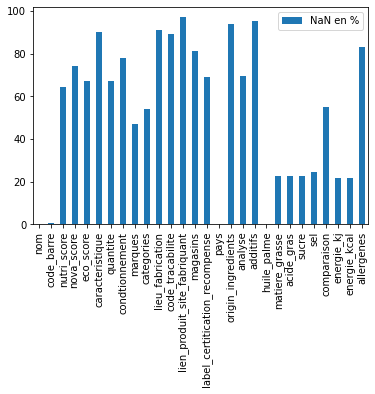

In [39]:
pd.DataFrame(DF.isna().mean().round(4) * 100, columns=['NaN en %']).plot(kind='bar')
plt.show()

In [163]:
def pourcentage_NaN_Global(data):
    somme = 0
    for f in list(data.columns):
        somme += data[f].isna().sum()
    return (somme / (data.shape[0]*data.shape[1]))*100

In [164]:
pourcentage_NaN_Global(DF)

51.87948852748787

## <div class='text text-primary' style='background:#FF0000; color:white; font-size:15px; padding:20px'>Nous voyons que la plupart des colonnes contient des valeurs inconnues à une proportion très forte et un taux global de 51.87948852748787%</div>


In [32]:

def convertir_colonne(df,cols):
    """
    Function qui convertisse les colonnes en numériques pour faciliter les calculs
    """
    for col in cols:
        df[col] = pd.to_numeric(df[col])
    return 

In [35]:
list_cols = [
    'huile_palme','sucre','energie_kcal',
    'matiere_grasse','acide_gras','sel','energie_kj','energie_kcal'
]

In [36]:
convertir_colonne(DF, list_cols) ## On applique la fonction sur ces colonnes choisies.

In [37]:
DF.describe()

,huile_palme,matiere_grasse,acide_gras,sucre,sel,energie_kj,energie_kcal
count,804668.000000,620644.000000,623635.000000,622895.000000,606206.000000,6.292200e+05,6.292200e+05
mean,0.013305,14.205273,5.423894,13.777405,1.261924,1.177005e+03,2.819005e+02
std,0.114577,17.521975,7.992593,20.071318,4.905101,1.546258e+04,3.697674e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,0.200000,0.600000,0.060000,4.640000e+02,1.110000e+02
50%,0.000000,8.000000,2.000000,3.500000,0.525000,1.096000e+03,2.620000e+02
75%,0.000000,22.200000,8.000000,20.000000,1.300000,1.674000e+03,4.000000e+02
max,1.000000,900.000000,400.000000,390.000000,700.000000,1.220000e+07,2.910000e+06


Gestion des données

> ***Nous calculons le pourcentage de donnnées manquantes de chaque colonne du dataFrame***


> En moyenne nous avons **51.87%** de données manquantes suivant différentes colonnes

##### Graphe des données manquantes dans le dataset

#### Résumé statististiques des colonnes numériques

In [40]:
print(DF.describe())

         huile_palme  matiere_grasse     acide_gras          sucre  \
count  804668.000000   620644.000000  623635.000000  622895.000000   
mean        0.013305       14.205273       5.423894      13.777405   
std         0.114577       17.521975       7.992593      20.071318   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        1.000000       0.200000       0.600000   
50%         0.000000        8.000000       2.000000       3.500000   
75%         0.000000       22.200000       8.000000      20.000000   
max         1.000000      900.000000     400.000000     390.000000   

                 sel    energie_kj  energie_kcal  
count  606206.000000  6.292200e+05  6.292200e+05  
mean        1.261924  1.177005e+03  2.819005e+02  
std         4.905101  1.546258e+04  3.697674e+03  
min         0.000000  0.000000e+00  0.000000e+00  
25%         0.060000  4.640000e+02  1.110000e+02  
50%         0.525000  1.096000e+03  2.620000e+02  
75%         

## REPONSES AUX QUESTIONS

#### 1. Distribution du nombre de produits par catégorie Nutri Score, Nova et Eco score.( 5'*4*'5 = 100 possibilités)

In [41]:
dfdist = DF.groupby(['nova_score','eco_score','nutri_score'])[['nom']].count()
#dfdist.reset_index(inplace =  True)

In [42]:
dfdist

nom
nova_score eco_score nutri_score      
1          A         A            1047
                     B              59
                     C              88
                     D              22
                     E               5
...                                ...
4          E         A             344
                     B            1054
                     C            1102
                     D            3772
                     E            4282

[96 rows x 1 columns]

#### 2. Liste des produits ayant “gluten free” optimaux (Nutri score A, Nova 1 et Ecoscore A)

In [91]:
Gluten_Free = DF[(DF['nova_score'] == '1') & (DF['nutri_score'] == 'A') & (DF['eco_score'] == 'A')][['nom']]

In [92]:
Gluten_Free

,nom
281,panzani tomacouli nature - 200g
282,boisson végétale soja sans sucres - bjorg - 1l
850,pomme sans sucres ajoutés - carrefour - 710g
852,panzani - bc - tomacouli nature bio - 250g
909,soja vanille - bjorg - 1l
...,...
646310,farine de blé - t110 complète - biocoop - 1kg
668979,lentille blonde - épicerise - 400g
681954,champignons entiers - yofi - 800g
725485,tagliatelle bio à base de haricots de soja no...


#### 3. Nombre de produit dont le ratio sucre/produit est supérieur à 0.6 
" On créera un dataframe de DF_Sucre_Sup_0_6"

In [45]:
DF_Sucre_Sup_0_6 = DF[DF['sucre']>0.6]

In [46]:
DF_Sucre_Sup_0_6[['nom','sucre']]

,nom,sucre
1,chocolat noir - nestlé - 205g,46.000
4,nutella - ferrero - 975g,56.300
6,american sandwich complet - harrys - 600g,4.900
7,muesli avoine chocolat bio - bjorg - 375g,9.100
8,biscottes 6 céréales - heudebert - 300g e,3.200
...,...,...
804651,protéines végétales - bionaturis,3.667
804670,crème d’ail - mille olives,6.300
804671,quiche au lard x 2 - sdb traiteur,2.600
804674,compote de pêche - baccara - 580g,24.000


#### 4. Liste des produits dont le nombre de calories pour 100g est supérieur à 500.

""DF_Energie_Sup_500_j""

In [47]:
DF_Energie_Sup_500_j = DF[DF['energie_kcal'] > 0.5].sort_values('energie_kcal',ascending=False)

In [48]:
DF_Energie_Sup_500_j

,nom,code_barre,nutri_score,nova_score,eco_score,caracteristique,quantite,condtionnement,marques,categories,...,additifs,huile_palme,matiere_grasse,acide_gras,sucre,sel,comparaison,energie_kj,energie_kcal,allergenes
141744,yummy creams creme de vanille - nül - 125g,3830036600045,E,4,NaN,NaN,125 g,a conserver dans un endroit sec à températur...,nül,en:biscuits vegan,...,NaN,0.0,91.000,21.0,6.0,25.00,NaN,12200000.0,2910000.0,NaN
800187,bruschetta - papi «mo» - 260g,37600057990089,D,NaN,B,NaN,260g,NaN,papi « mo »,"aliments et boissons à base de végétaux,ali...",...,NaN,0.0,3.400,0.7,1.1,1.20,pains de mie,1094259.0,261534.0,NaN
92067,lait de coco bio - le coq noir - 400ml,3269710288567,C,1,B,NaN,400 ml,"conserve,métal",le coq noir,"aliments et boissons à base de végétaux,boi...",...,NaN,0.0,22.000,20.0,0.0,NaN,laits de coco,855.0,208279.0,NaN
110650,acérola 1000 - la vie claire - 145g,3266191106540,E,NaN,NaN,NaN,145 g,"boite en plastique,plastique,boîte en plastique",la vie claire,"compléments alimentaires,vitamines",...,NaN,0.0,0.345,0.0,35.5,0.69,vitamines,54700.0,13100.0,NaN
802806,2000000124991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,100.000,2.0,1.0,1.00,NaN,46911.0,11212.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587400,spiruline en dragées,3770008839045,C,NaN,E,NaN,NaN,NaN,NaN,"compléments alimentaires,spiruline",...,NaN,0.0,1.000,1.0,0.0,2.00,spiruline,4.0,1.0,NaN
159891,thé vert de chine mangue bergamote,3701173503127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.000,0.0,0.0,0.00,NaN,4.0,1.0,NaN
77471,"dosettes à café, classic - carte noire - 48",8000070201521,NaN,NaN,NaN,NaN,48,dosettes souples,carte noire,"aliments et boissons à base de végétaux,ali...",...,NaN,0.0,1.000,1.0,1.0,NaN,cafés,4.0,1.0,NaN
524982,cotes marinees a griller,2613569056616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,1.000,1.0,1.0,1.00,NaN,4.0,1.0,NaN


#### 5 Liste des produits contenant de l’huile de palme, vendu en France et en Belgique

In [49]:
m1 = DF['huile_palme']==1
m2 = DF['pays'].str.contains('france')
m3 = DF['pays'].str.contains('belgique')
DF[m1 & m2 & m3]

,nom,code_barre,nutri_score,nova_score,eco_score,caracteristique,quantite,condtionnement,marques,categories,...,additifs,huile_palme,matiere_grasse,acide_gras,sucre,sel,comparaison,energie_kj,energie_kcal,allergenes
4,nutella - ferrero - 975g,3017620420047,E,4,D,pâte à tartiner aux noisettes et au cacao,975 g,"verre,couvercle,carton,opercule,pot",ferrero,"produits à tartiner,petit-déjeuners,produits...",...,e322 - lécithines,1.0,30.9,10.6,56.3,0.107,pâtes à tartiner aux noisettes et au cacao,2252.0,539.0,"Lait,Fruits à coque,Soja"
8,biscottes 6 céréales - heudebert - 300g e,3392460480827,C,4,B,biscottes 6 céréales,300 g e,"sachet,plastique,etui,carton,film plastique à...",heudebert,"aliments et boissons à base de végétaux,ali...",...,e300 - acide ascorbique,1.0,8.0,2.4,3.2,1.610,biscottes-aux-cereales,1722.0,404.0,"Gluten,Avoine,Graines de sésame,en:avoine"
18,napolitain l_original - lu - 6x 30g,3017760290692,E,4,E,gâteau fourrage au chocolat - napolitain classic,6 x 30 g,"carton,sachets individuels,pensez au tri!,sach...",lu,"snacks,desserts,snacks sucrés,biscuits et gâ...",...,"e422 - glycérol,e471 - mono- et diglycérides...",1.0,20.0,8.9,34.0,0.240,gâteaux au chocolat,1791.0,428.0,"Œufs,Gluten,Lait,Soja"
19,cracotte - lu - 250g (2x 18),3041090063114,C,4,B,tartines craquantes au froment enrichies en fer,250 g (2x 18),"carton recyclable,plastique jetable",lu,"aliments et boissons à base de végétaux,ali...",...,e322i - lécithine,1.0,2.7,1.0,7.9,1.680,tartines craquantes,1642.0,387.0,"Gluten,Lait"
36,céréales extra pepites kellogg_s chocolat no...,3159470005071,D,4,D,pépites d_avoine croustillantes avec des morc...,500 g,"sachet plastique,point vert,triman,sachet plas...",kellogg_s,"aliments et boissons à base de végétaux,ali...",...,e322i - lécithine,1.0,25.0,12.0,21.0,0.630,pépites de céréales au chocolat,2076.0,497.0,"Gluten,Lait,Fruits à coque,Avoine,Soja"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624970,becel a l huile de noix,8714100725436,D,4,NaN,NaN,NaN,NaN,becel,matières grasses,...,e471 - mono- et diglycérides d_acides gras al...,1.0,70.0,17.0,0.5,0.400,matières grasses,2590.0,619.0,NaN
625322,twisted mix salé - party hits - 100g,8716788001260,D,4,C,twisted mix salted - snack de pomme de terre s...,100 g,"sachet,plastique",party hits,"snacks,snacks salés,apéritif,biscuits apéri...",...,"e621 - glutamate monosodique,,,risque élevé ...",1.0,24.8,3.3,1.8,2.700,biscuits apéritifs soufflés à base de pomme...,2008.0,480.0,"Gluten,Lait,Soja,Anhydride sulfureux et sulfites"
649965,kruid-noten - favorina - 350gr,20717063,E,4,C,NaN,350 gr,sachet plastique,favorina,"snacks,snacks sucrés,biscuits et gâteaux,bis...",...,"e502 - carbonates,e450 - diphosphates,,,risque...",1.0,11.7,5.2,31.0,1.400,biscuits secs,1803.0,431.0,Gluten
664107,croquettes au fromage - carrefour - 400g,5400101040731,D,4,NaN,NaN,400 g,carton,carrefour,"snacks,snacks salés,produits panés,fromages ...",...,"e14xx - amidons modifiés,e407 - carraghénane...",1.0,11.0,6.9,3.7,1.500,fritures,833.0,199.0,"Gluten,Lait"


#### 6)  Distribution des produits par nombre de pays de vente

In [50]:
DF['pays'] = DF[['pays']].replace("None",'XXX')


In [103]:
def nombre_pays(text):
    if isinstance(text, str):
        return int(len(text.split(',')))
    else:
        return np.NaN

In [104]:
nombre_pays = DF['pays'].apply(lambda x: nombre_pays(x))

In [105]:
DF['nombre_pays'] = nombre_pays

In [106]:
DF[['nom','nombre_pays']].sort_values('nombre_pays',ascending=False)

,nom,nombre_pays
359079,barra con proteína - herbalife - 560g,113.0
23205,mélange pour boisson protéinée - herbalife ...,110.0
297924,cr7 drive - herbalife - 13.5g,110.0
110007,formula 1 nutritional shake mix fragola deligh...,110.0
70244,herbalife formule 1 sport - 524g,109.0
...,...,...
9934,vinaigrette légère puget,NaN
10420,vinaigrette légère puget bio,NaN
11408,vinaigrette légère puget bio,NaN
12184,vinaigrette légère isio 4,NaN


In [55]:
#DF.groupby('nom')['pays'].count().sort_values(ascending=False)

### ETUDE SUPLEMENTAIRE

>A - **Plus de 50555 marques différentes**

In [56]:
DF.marques.nunique()

50555

Nous pouvons voir ici que ***50555*** marques différentes .
> Les produits dont tous les scores sont manquants ( nova = 'XXX', eco_score ='XXX',nutri_score ='XXXX')
<hr>

> B- **Les produits dont les tous les scores manquent** au nombre de **425884**

In [57]:
DF[DF.nova_score.isna() & DF.nutri_score.isna() & DF.eco_score.isna() ].shape[0]

425884

> Rapport sur les produits sans marques et réaliser un graphe sur les produits avec et sans marque

In [161]:
def draw_percentage_na(df,col):
    """
    Fonction qui represente le graphe des valeurs manquantes
    """
    classes ={}
    name_opposite = "Values NaN"
    classes[name_opposite] = df[df[col].isna()]['nom'].shape[0]
    
    classes[col] = len(df) - classes[name_opposite]
    labels = list(classes.keys())
    values = list(classes.values())
    plt.pie(values, labels=labels)
    plt.show()

In [59]:
pourcentage_sans_marques

52.9913903235588

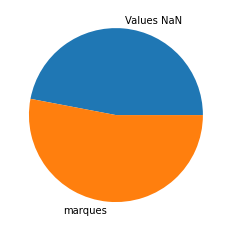

In [180]:
draw_percentage_na(DF, 'marques')

 > Afficher le graphe .. sur les marques ..  les produits sans marques représentent ***46,8 %***

> Le nombre de marques sur le jeu de données est : ***50474***

In [61]:
DF.marques.nunique()

50555

In [62]:
DF[DF.marques.isna()].shape

(378267, 29)

> Distribution des produits regrouper par marque 
> On recupère les 50 plus representatives .. 

In [63]:
#print(DF.groupby(['marques'])['nom'].count().sort_values(ascending=False))

DF_per_Marques = DF.groupby(['marques'])['nom'].count().sort_values(ascending=False)[:60]


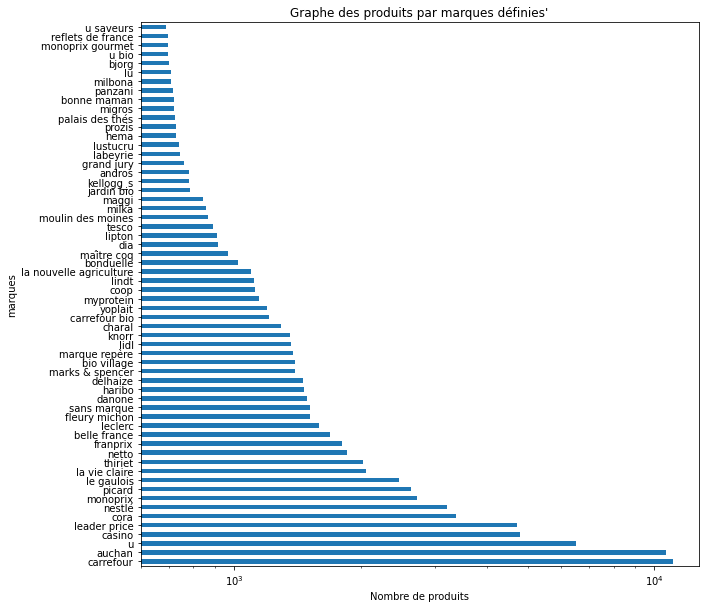

In [64]:
plt.figure(figsize=(10,10))
DF_per_Marques.plot(kind='barh')

plt.xlabel('Nombre de produits')
#plt.legend('Graphe des produits par marques définies')
plt.title("Graphe des produits par marques définies'")
plt.xscale("log")
plt.show()

> Graphe des nombre de produits par marques définies

> ***Nous voyons la grande distribution en tête .. Carrefour, Auchan, puis U, et Casino .. LeaderPrice..***

In [65]:
DF_per_Marques.idxmax() ## Nous voyons que Carrefour et Auchan est larg

'carrefour'

In [66]:
DF_per_Marques.iloc[DF_per_Marques.argmax()] ## nombre de produits differents sous la marques Carrefour.. 

11089

> ## **Carrefour** ##

<img src='carrefour.jpeg'>

In [67]:
DF_score_Carrefour = DF[DF.marques=='carrefour'][['nom','nutri_score','nova_score','eco_score']]

In [68]:
DF_score_Carrefour.groupby(['nutri_score','nova_score','eco_score']).size().sort_values(ascending=False)

nutri_score  nova_score  eco_score
E            4           D            236
D            4           D            226
                         C            189
                         B            185
C            4           B            170
                                     ... 
D            1           C              2
E            1           C              2
C            1           A              1
D            2           A              1
             1           E              1
Length: 80, dtype: int64

> Nous voyons la tendance est dominée par des mauvaises score **nutriscore (mauvais), de nova_score (mauvais), et de eco_score mauvais**

> ## **Quels sont les produits mieux notés chez Carrefour?** ## 
<code>(ECO_SCORE=A ou B, NOVA =1 ou 2, NUTRI_SCORE=A ou B)</code>

In [121]:
cond_nutri_score =((DF_score_Carrefour.nutri_score=="A") | (DF_score_Carrefour.nutri_score=="B"))
cond_nova_score =((DF_score_Carrefour.nova_score=="1") | (DF_score_Carrefour.nova_score=="2"))
cond_eco_score =((DF_score_Carrefour.eco_score=="A") | (DF_score_Carrefour.eco_score=="B"))


In [122]:
BestOf_Carrefour=DF_score_Carrefour[cond_nutri_score & cond_nova_score & cond_eco_score]

In [124]:
BestOf_Carrefour

,nom,nutri_score,nova_score,eco_score
850,pomme sans sucres ajoutés - carrefour - 710g,A,1,A
1980,œufs de poule élevées en plein air - carrefo...,A,1,B
2070,fusilli blé complet - carrefour - 500g,A,1,B
2079,muesli floconneux 5 céréales nature - carref...,A,1,B
2660,œufs de poules elevées en plein air - carrefo...,A,1,B
...,...,...,...,...
565149,mini pipe (al dente 6 min) - carrefour - 500g,A,1,B
565153,pâtes d_alsace spaghetti (7 œufs frais) - car...,A,1,B
565275,riz long grain - carrefour - 500g,A,1,B
565406,radiatori - carrefour - 250g,A,1,B


> ***Tendence Notion sur Auchan***

In [71]:
DF_score_Auchan = DF[DF.marques=='auchan'][['nom','nutri_score','nova_score','eco_score']]

In [72]:
DF_score_Auchan.groupby(['nutri_score','nova_score','eco_score']).size().sort_values(ascending=False)

nutri_score  nova_score  eco_score
D            4           D            197
                         B            170
C            4           B            167
                         C            159
D            4           C            159
                                     ... 
C            2           B              1
D            1           E              1
C            1           A              1
E            4           A              1
             1           B              1
Length: 82, dtype: int64

>> Nous voyons cette même tendance chez Auchan  dominée par des mauvais score **nutriscore D (mauvais), de nova_score (mauvais), et de eco_score moyen**

> ## **Quels sont les produits mieux notés chez Auchan?** ## 
<code>(ECO_SCORE=A ou B, NOVA =1 ou 2, NUTRI_SCORE=A ou B)</code>

<img src='auchan.png'>

In [125]:
cond_nutri_score_auchan =((DF_score_Auchan.nutri_score=="A") | (DF_score_Auchan.nutri_score=="B"))
cond_nova_score_auchan =((DF_score_Auchan.nova_score=="1") | (DF_score_Auchan.nova_score=="2"))
cond_eco_score_auchan =((DF_score_Auchan.eco_score=="A") | (DF_score_Auchan.eco_score=="B"))

In [126]:
Best_of_Auchan =DF_score_Auchan[cond_nutri_score_auchan & cond_nova_score_auchan & cond_eco_score_auchan]

In [127]:
Best_of_Auchan

,nom,nutri_score,nova_score,eco_score
2528,flocons d_avoine - auchan - 500g.,A,1,B
6559,compote de pommes - auchan - 710g,A,1,A
7141,lait demi-écrémé - auchan - 1l e,B,1,B
8643,flocon d_avoine - auchan - 500g,A,1,B
9074,lait équitable demi-écrémé - auchan - 1l,B,1,B
...,...,...,...,...
569131,lait demi-écrémé - auchan - 1l e,B,1,B
569163,lait demi-écrémé stérilisé uht - auchan -...,B,1,B
588141,pulpe de tomates - auchan - 240g,A,1,A
638351,compote pomme sans sucres ajoutés - auchan - ...,A,1,A


> ## **Quels meilleurs produits vendus ensemble dans ces deux magasins?** ##


<img src='auchan-carrefour.jpeg'>

In [128]:
BEST_OFF_CAR_AUCH_CROISES = pd.merge(Best_of_Auchan, BestOf_Carrefour,  how='inner', on =['nom'])

> **Tous les produits de carrefour et auchan sont différents.** 


##### BEST_OF_OFF_AUCH_CAR_ASS = pd.concat

In [129]:
BEST_OF_OFF_AUCH_CAR_ASS = pd.concat([Best_of_Auchan, BestOf_Carrefour])

In [130]:
BEST_OF_OFF_AUCH_CAR_ASS

,nom,nutri_score,nova_score,eco_score
2528,flocons d_avoine - auchan - 500g.,A,1,B
6559,compote de pommes - auchan - 710g,A,1,A
7141,lait demi-écrémé - auchan - 1l e,B,1,B
8643,flocon d_avoine - auchan - 500g,A,1,B
9074,lait équitable demi-écrémé - auchan - 1l,B,1,B
...,...,...,...,...
565149,mini pipe (al dente 6 min) - carrefour - 500g,A,1,B
565153,pâtes d_alsace spaghetti (7 œufs frais) - car...,A,1,B
565275,riz long grain - carrefour - 500g,A,1,B
565406,radiatori - carrefour - 250g,A,1,B


In [131]:
def retirer_auchan_du_nom(text):
    """
    retirer auchan
    """
    nom = "auchan"
    if nom in text:
        text = text.replace('- '+nom, '').strip()
    return text
def retirer_carrefour_du_nom(text):
    """
    retirer carrefour
    """
    nom = "carrefour"
    if nom in text:
        text = text.replace('- '+nom, '').strip()
    return text

def retirer_auchan_carrefour_du_nom(text):
    """Retirer le nom de auchan ou de carrefour"""
    nom_magasin= ['auchan','carrefour']
    for nom in nom_magasin:
        if nom in text:
            text = text.replace('- '+nom, '').strip()
    return text


In [132]:
Best_of_Auchan_sans_nom_magasin = Best_of_Auchan['nom'].apply(lambda x: retirer_auchan_du_nom(x))

In [133]:
BestOf_Carrefour_sans_nom_magasin = BestOf_Carrefour['nom'].apply(lambda x: retirer_carrefour_du_nom(x))

> On peut faire maitenant effectuer la jointure, un croisement

>  **Association des deux dataFrame en supprimant les chaines "carrefour" et "auchan" des noms des produits**

In [134]:
BEST_OFF_CAR_AUCH_CROISES = pd.merge(Best_of_Auchan_sans_nom_magasin, BestOf_Carrefour_sans_nom_magasin, how='inner', on =['nom'])

### CONCLUSION SUR LES PRODUITS DES MAGASINS CARREFOUR ET AUCHAN

> Importe que le magasin, soit Auchan ou Carrefour, Ces produits sous listés sont de bonne  qualité...

In [139]:
BEST_OFF_CAR_AUCH_CROISES.drop_duplicates( inplace=True)

In [140]:
BEST_OFF_CAR_AUCH_CROISES

,nom
0,lait demi-écrémé - 1l e
2,flocon d_avoine - 500g
3,riz complet - 500g
4,couscous grain moyen - 1kg
6,couscous grain moyen - 500g
8,purée de tomates - 500g
10,lentilles vertes - 500g
13,lait demi-écrémé - 1l
18,couscous grain fin - 500g
19,farine de blé t45 - 1kg


## Etudes des allergies notées.. 

#### L’allergie alimentaire, comme toutes les allergies, est une réaction du système immunitaire contre quelque chose qui est normalement sans danger pour la plupart des gens, comme les protéines du lait de vache ou de l’œuf etc.

#### Un allergène est une substance étrangère à l’organisme, d’origine naturelle ou synthétique. La plupart du temps inoffensive, elle met pourtant le corps humain sur la défensive. A son contact, ce dernier  procède à la mise en marche de son système immunitaire qui va libérer ses anticorps (IgE) pour neutraliser l’allergène suspecté d’être un perturbateur.
https://www.passeportsante.net/fr/Actualites/Dossiers/DossierComplexe.aspx?doc=allergenes-dans-nos-cosmetique#:~:text=Ils%20peuvent%20se%20manifester%20sous,buccale%20et%20l'appareil%20digestif.

In [83]:
mask_allergies = (DF.allergenes !=np.NaN)
allergenes = DF[mask_allergies].groupby('allergenes')['nom'].count().sort_values(ascending=False)
#dict_allergenes = dict(allergenes)
allergenes

allergenes
Lait                                                                                           28166
Gluten                                                                                         16593
Gluten,Lait                                                                                     8094
Œufs,Gluten,Lait                                                                                7307
Fruits à coque                                                                                  4077
                                                                                               ...  
Lait,Pois,Pois                                                                                     1
Lait,Pignons                                                                                       1
Lait,Phénylalanine                                                                                 1
Lait,Phenylalanine                                                              

> On affiche sur le graphe les 100 parmi les plus cités

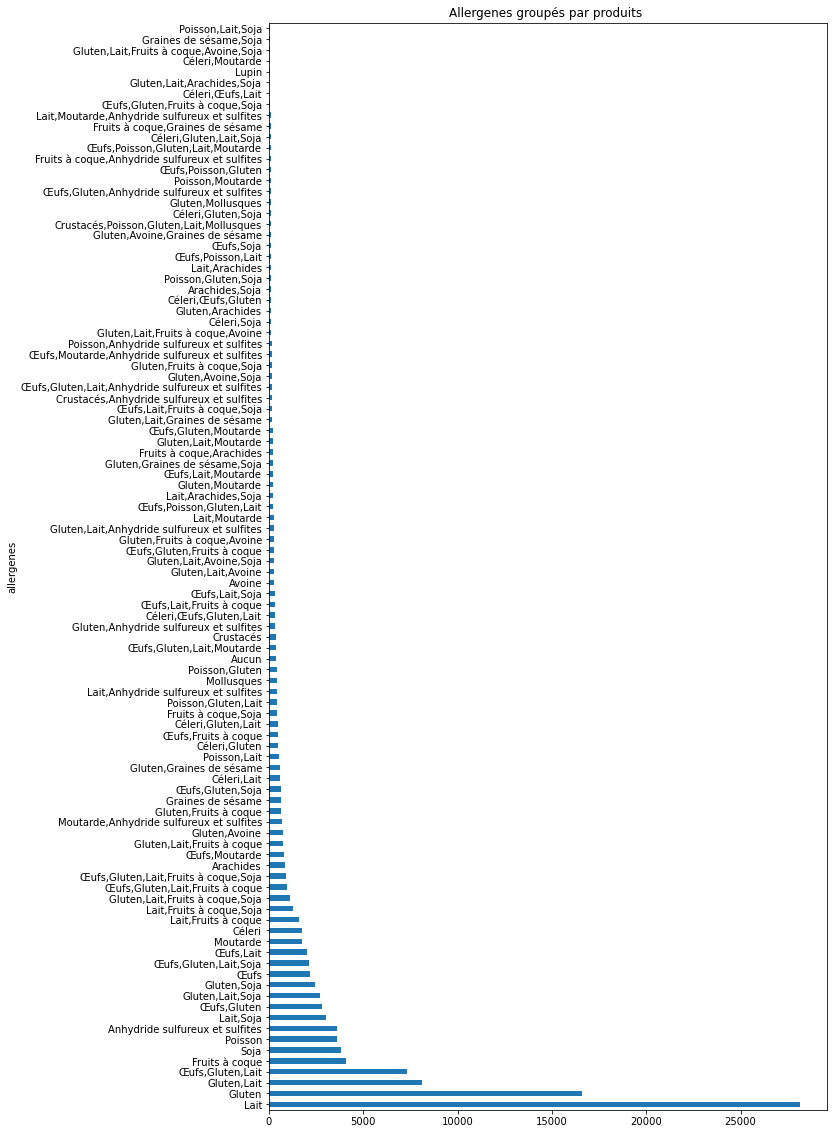

In [84]:
plt.figure(figsize=(10,20))
allergenes[:100].plot(kind='barh')
plt.title("Allergenes groupés par produits ")
plt.show()

> **Determiner le nombre de produits pour  chaque allergene** , 

In [85]:
dict_allergenes={}
for allerg, value  in allergenes.items():
    new_keys = allerg.split(',')
    if  allerg.lower().strip() =="aucun":
        allergenes.pop(allerg)
    if len(new_keys)>=2:
        for nk in new_keys:
            if nk in dict_allergenes:
                dict_allergenes[nk] = dict_allergenes[nk]+ value
    else:
        dict_allergenes[allerg] = value
        
DF_allgenes =pd.DataFrame.from_dict(dict_allergenes, orient='index',columns=['nombre'])

In [86]:
DF_allgenes

,nombre
Lait,75014
Gluten,63650
Fruits à coque,16971
Soja,25539
Poisson,9504
...,...
Noisettes décortiquées*,1
NOIX D'AMAZONIE,1
NITRATE DE POTASSIUM,1
Métabisulfite de potassium,3


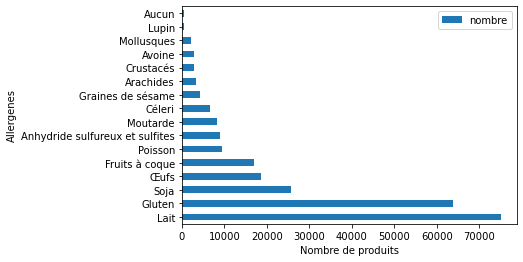

In [144]:
DF_allgenes[DF_allgenes.nombre >500][:20].sort_values('nombre',ascending=False).plot(kind='barh')
plt.xlabel('Nombre de produits')
plt.ylabel('Allergenes')
plt.show()

### CONCLUSION SUR LES ALLERGENES:

> Nous constatons que les allergènes (lait, Gluten, Soja, Oeuf, Fruits à coque.. ) sont notés dans plusieurs produits. 

### Si vous êtes allergique, manger ces aliments peut être dangereux. 

***Source: https://www.thermofisher.com/diagnostic-education/patient/fr/fr/allergy-types/food-allergies.html***